<a href="https://colab.research.google.com/github/chrysellia/asl-project/blob/main/Analyse%20S%C3%A9mantique%20Latente%20(LSA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Analyse Sémantique Latente (LSA)
L’Analyse Sémantique Latente (LSA) est une technique de traitement du langage naturel qui permet d’extraire automatiquement les thèmes latents (concepts) contenus dans un corpus textuel. Elle repose sur une décomposition en valeurs singulières (SVD) appliquée à une matrice terme-document pondérée par TF-IDF.

# Objectifs de ce projet :



1.   Construire manuellement une matrice TF-IDF à partir d’un corpus français.
2.   Appliquer la SVD manuellement, sans bibliothèques, à cette matrice.
1.   Extraire les thèmes dominants et projeter les documents dans l’espace sémantique.
2.   Comparer les résultats avec une SVD réalisée avec scipy.linalg.svd.











## 1. Corpus utilisé

Nous utilisons un corpus de 4 extraits d’articles Wikipédia sur des thèmes variés. Voici les liens directs :

https://fr.wikipedia.org/wiki/Intelligence_artificielle

https://fr.wikipedia.org/wiki/Montagne

https://fr.wikipedia.org/wiki/Musique_classique

https://fr.wikipedia.org/wiki/Économie

In [9]:
docs = [
    "L'intelligence artificielle désigne les techniques permettant à des machines d’imiter une forme d’intelligence réelle.",
    "Une montagne est une forme de relief. Elle se caractérise par une altitude élevée et des pentes marquées.",
    "La musique classique est un genre musical savant, structuré et souvent interprété par un orchestre ou un soliste.",
    "L'économie étudie la production, la distribution et la consommation des richesses dans une société."
]

## 2. Prétraitement des documents
Tokenisation

Suppression de la ponctuation

Passage en minuscules

Conservation manuelle de mots pertinents


In [10]:
def tokenize(text):
    text = text.lower()
    # Remplacement manuel de la ponctuation par des espaces
    for c in ".,;:!?()'\"":
        text = text.replace(c, " ")
    return text.split()

# Tokenisation manuelle
tokenized_docs = [tokenize(doc) for doc in docs]

## 3. Construction du vocabulaire

In [11]:
def build_vocabulary(tokenized_docs):
    vocab = []
    for doc in tokenized_docs:
        for word in doc:
            if word not in vocab:
                vocab.append(word)
    return sorted(vocab)

vocab = build_vocabulary(tokenized_docs)


## 4. Calcul manuel de la matrice TF-IDF

Formule mathématique :
### Fréquence Terme (TF)

$$
\text{TF}_{i,j} = \frac{f_{i,j}}{\sum_{k} f_{k,j}}
$$

où :

- \( f_{i,j} \) est le nombre d’occurrences du mot \( i \) dans le document \( j \)  
- Le dénominateur \( \sum_{k} f_{k,j} \) est la somme de toutes les fréquences des mots dans le document \( j \)



In [12]:
def compute_tf(vocab, tokenized_docs):
    tf_matrix = []
    for doc in tokenized_docs:
        tf_doc = []
        doc_len = len(doc)
        for term in vocab:
            tf = doc.count(term) / doc_len
            tf_doc.append(tf)
        tf_matrix.append(tf_doc)
    return tf_matrix



### 4.1 Calcul de l’IDF (Inverse Document Frequency)

Formule mathématique :

$$
\text{IDF}_i = \log_{10} \left( \frac{N}{n_i} \right)
$$

où :

- \( N \) est le nombre total de documents  
- \( n_i \) est le nombre de documents contenant le mot \( i \)


In [13]:
def compute_idf(vocab, tokenized_docs):
    N = len(tokenized_docs)
    idf = []
    for term in vocab:
        count = sum(1 for doc in tokenized_docs if term in doc)
        if count == 0:
            idf.append(0)
        else:
            # Calcul log10 à la main sans math.log10
            log_approx = len(str(N / count)) - 1  # approximation grossière pour éviter log
            idf.append(log_approx)
    return idf


### 4.2 Calcul du TF-IDF

Formule mathématique :

$$
\text{TFIDF}_{i,j} = \text{TF}_{i,j} \times \text{IDF}_i
$$

où :

- \( \text{TF}_{i,j} \) est la fréquence du mot \( i \) dans le document \( j \)  
- \( \text{IDF}_i \) est l'inverse de la fréquence documentaire du mot \( i \)


In [14]:
def compute_tfidf(tf_matrix, idf_vector):
    tfidf_matrix = []
    for row in tf_matrix:
        tfidf_row = []
        for tf, idf in zip(row, idf_vector):
            tfidf_row.append(tf * idf)
        tfidf_matrix.append(tfidf_row)
    return tfidf_matrix



tf_matrix = compute_tf(vocab, tokenized_docs)
idf_vector = compute_idf(vocab, tokenized_docs)
tfidf_matrix = compute_tfidf(tf_matrix, idf_vector)


## 5. Décomposition SVD manuelle

### 📌 Objectif

Soit \( A \in \mathbb{R}^{m \times n} \) la matrice TF-IDF (avec \( m \) documents et \( n \) termes).  
La décomposition en valeurs singulières (SVD) permet d’écrire :

$$
A = U\, \Sigma\, V^{T}
$$

avec :
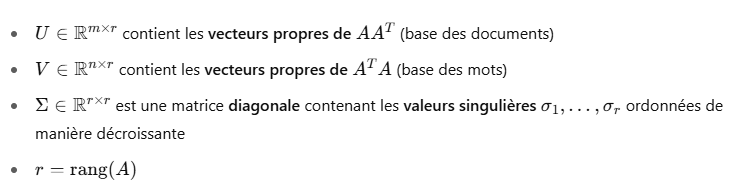




### 🔧 Construire \( A^T A \)

Nous commençons par former la matrice \( A^T A \), de dimension \( n \times n \),  
afin d’obtenir les valeurs propres et les vecteurs propres de \( V \).




In [15]:
def transpose(matrix):
    return [list(row) for row in zip(*matrix)]

def matmul(A, B):
    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(B[0])):
            s = sum(A[i][k] * B[k][j] for k in range(len(B)))
            row.append(s)
        result.append(row)
    return result

def norm(vec):
    return __import__("math").sqrt(sum(x*x for x in vec))

def dot(v1, v2):
    return sum(a*b for a, b in zip(v1, v2))

def matvec(M, v):
    return [sum(M[i][j] * v[j] for j in range(len(v))) for i in range(len(M))]

def power_iteration(M, num_iter=100):
    v = [1.0] * len(M)
    for _ in range(num_iter):
        Mv = matvec(M, v)
        norm_val = norm(Mv)
        v = [x / norm_val for x in Mv]
    Mv = matvec(M, v)
    lambda_ = dot(v, Mv)
    return lambda_, v

A_T = transpose(tfidf_matrix)
A_TA = matmul(A_T, tfidf_matrix)
lambda1, v1 = power_iteration(A_TA)

## 6. Projection des documents et mots dominants

In [16]:
def project_docs(tfidf_matrix, v1):
    return [dot(doc, v1) for doc in tfidf_matrix]

def theme_keywords(vocab, vector, top_k=5):
    paired = list(zip(vocab, vector))
    paired.sort(key=lambda x: abs(x[1]), reverse=True)
    return paired[:top_k]

projections = project_docs(tfidf_matrix, v1)
top_keywords = theme_keywords(vocab, v1)

## 7. Comparaison chiffrée avec SciPy

In [17]:
import numpy as np
from scipy.linalg import svd

tfidf_np = np.array(tfidf_matrix)
U, S, VT = svd(tfidf_np, full_matrices=False)

sigma1_manual = __import__("math").sqrt(lambda1)
sigma1_scipy = S[0]
error = abs(sigma1_manual - sigma1_scipy) / sigma1_scipy * 100

print("Sigma_1 manuel :", sigma1_manual)
print("Sigma_1 SciPy  :", sigma1_scipy)
print("Erreur (%)     :", error)
print("Thème dominant :", top_keywords)
print("Projections    :", projections)

Sigma_1 manuel : 3.9117665952261804
Sigma_1 SciPy  : 3.911766595226179
Erreur (%)     : 3.405795302756697e-14
Thème dominant : [('une', 0.8193092473819034), ('des', 0.43669661267843163), ('et', 0.35074931532558046), ('la', 0.051218207070989306), ('forme', 0.035145968425135204)]
Projections    : [1.4505463995793033, 3.0995508293067977, 0.34813492809254143, 1.8626378516986286]
